# Data Analysis (Assignment 6)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

### Table of Contents
- Data
    - Uploading Data
    - Observations of New Dataset
    - Data Cleaning New Dataset
- Block 1: Gender Leadership Gap: What proportion of company executives are female? Male?
- Block 2: Among LinkedIn users who work at large companies, is the proportion of users who include a profile picture larger than the proportion without profile pictures?
- Block 3: Are there more LinkedIn Premium members than regular users working at well-known companies?
- Block 4: Do millenials tend to switch positions more frequently than other age groups?
- Block 5: Do the proportion of Asians, Whites, and Blacks working at Fortune 500 companies reflect their overall population proportions?

### Uploading Data

In [3]:
linkedin_original = pd.read_csv('../data/clean/linkedin_original.csv', encoding='latin-1')

**Note:** After receiving feedback on my last assignment, I've taken a look at the dataset that was suggested. The following analysis is conducted on that dataset (https://www.kaggle.com/killbot/linkedin-profiles-and-jobs-data/notebooks).

In [4]:
linkedin_updated = pd.read_csv('../data/raw/linkedin_new.csv', encoding='latin-1')

In [5]:
linkedin_updated.head(2)

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,...,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5,989.9361
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5,989.9361


In [6]:
linkedin_updated.shape

(39537, 27)

In [7]:
linkedin_updated.columns

Index(['Unnamed: 0', 'ageEstimate', 'companyFollowerCount', 'companyHasLogo',
       'companyName', 'companyStaffCount', 'companyUrl', 'companyUrn',
       'connectionsCount', 'country', 'endDate', 'followable',
       'followersCount', 'genderEstimate', 'hasPicture', 'isPremium',
       'mbrLocation', 'mbrLocationCode', 'mbrTitle', 'memberUrn',
       'posLocation', 'posLocationCode', 'posTitle', 'positionId', 'startDate',
       'avgMemberPosDuration', 'avgCompanyPosDuration'],
      dtype='object')

### Observations of the New Dataset

* Each row represents a LinkedIn user
* Many of the columns are similar to the ones from my original dataset (descriptions of those columns are in the "Initial Data Analysis" file)
* This dataset includes more information on the company of each LinkedIn user, but less information on the LinkedIn user themself

### Data Cleaning New Dataset

**1. Drop irrelevant columns and faulty rows**

In [8]:
linkedin_updated = linkedin_updated.drop(['Unnamed: 0', 'companyHasLogo', 'companyUrl', 'companyUrn', 
                                'country', 'endDate', 'followable','mbrLocation', 'mbrLocationCode','mbrTitle','memberUrn',
                               'posLocation', 'posLocationCode','positionId', 'startDate','avgCompanyPosDuration'], axis = 1)

In [9]:
#check whether there are rows to remove based on age
linkedin_updated.sort_values(by='ageEstimate', ascending=True).head(10)

,ageEstimate,companyFollowerCount,companyName,companyStaffCount,connectionsCount,followersCount,genderEstimate,hasPicture,isPremium,posTitle,avgMemberPosDuration
21464,20.0,23344.0,Navitas,3704.0,500.0,738.0,male,PDILB-vuuZqDf3K728ozT8PTfrPA56rxtTQKPuwd0j4.jpg,0.0,Student Ambassador,317.5714
31406,20.0,15761.0,Australian Institute of Project Management AIPM,84.0,491.0,496.0,female,FcOdh_LdVqmt8mfzy2RVXrk_en-uBGNZYremOaVim1M.jpg,0.0,Councillor South Australia,245.6000
31405,20.0,18135.0,SA Health,8930.0,491.0,496.0,female,FcOdh_LdVqmt8mfzy2RVXrk_en-uBGNZYremOaVim1M.jpg,0.0,"Change Manager, New Royal Adelaide Hospital",245.6000
29571,20.0,2470.0,Centuria Capital Limited,71.0,500.0,596.0,male,NaN,0.0,Investment Analyst,661.2500
21465,20.0,1518.0,KFC Roos Foods,1048.0,500.0,738.0,male,PDILB-vuuZqDf3K728ozT8PTfrPA56rxtTQKPuwd0j4.jpg,0.0,Crew Member,317.5714
21466,20.0,1236.0,mmw3degrees,68.0,500.0,738.0,male,PDILB-vuuZqDf3K728ozT8PTfrPA56rxtTQKPuwd0j4.jpg,0.0,Marketing Automation Team Lead,317.5714
38094,20.0,1996.0,Ballarat Health Services,932.0,119.0,123.0,male,NaN,0.0,Manager Information Technology Operations,901.1250
38093,20.0,1996.0,Ballarat Health Services,932.0,119.0,123.0,male,NaN,0.0,Director Information Technology,901.1250
38092,20.0,2339.0,Symbion Pty Ltd,272.0,119.0,123.0,male,NaN,0.0,"State Manager ICT, Pathology (Victoria)",901.1250
38091,20.0,14823.0,Monash Health,4959.0,119.0,123.0,male,NaN,0.0,Director Information Technology,901.1250


In [10]:
#check whether there are rows to remove based on position duration
linkedin_updated.sort_values(by='avgMemberPosDuration', ascending=True).head(10)

,ageEstimate,companyFollowerCount,companyName,companyStaffCount,connectionsCount,followersCount,genderEstimate,hasPicture,isPremium,posTitle,avgMemberPosDuration
20506,21.0,24855.0,Forever New Clothing,1004.0,16.0,16.0,female,NaN,0.0,Sales Assistant,0.0
21740,36.0,126361.0,Westpac,12393.0,71.0,71.0,female,NaN,0.0,Senior Retail Lease Manager,0.0
21739,36.0,126361.0,Westpac,12393.0,71.0,71.0,female,NaN,0.0,Senior Retail Lease Manager,0.0
25319,27.0,159999.0,Deakin University,7646.0,100.0,100.0,NaN,NaN,0.0,Casual Research Assistant,0.0
34935,31.0,18964.0,Aconex,740.0,353.0,352.0,male,RqkCGCaCY2mf11PqLx0N4hzcoA7mdawg0YhUxN9r6o0.jpg,0.0,Graduate Platform Engineer,28.0
34936,31.0,114.0,Mystic Pants Pty Ltd,13.0,353.0,352.0,male,RqkCGCaCY2mf11PqLx0N4hzcoA7mdawg0YhUxN9r6o0.jpg,0.0,Software/ Web Developer Intern,28.0
34937,31.0,2712994.0,Oracle,165109.0,353.0,352.0,male,RqkCGCaCY2mf11PqLx0N4hzcoA7mdawg0YhUxN9r6o0.jpg,0.0,Associate Software Engineer,28.0
32335,27.0,40014.0,Bunnings,7469.0,37.0,37.0,female,NaN,0.0,Tools Expert,30.0
17310,29.0,69.0,Kapow Pictures,2.0,39.0,39.0,female,Ua9sVnIoLbgue0O7dpzMuZ-aHaE799n01Q7pHwiCgaU.jpg,0.0,Internship,30.0
23589,29.0,17209.0,Pitcher Partners,1238.0,215.0,215.0,male,NaN,0.0,Consultant,30.0


In [11]:
linkedin_updated = linkedin_updated[linkedin_updated['avgMemberPosDuration']>0]

In [12]:
linkedin_updated.head(2)

,ageEstimate,companyFollowerCount,companyName,companyStaffCount,connectionsCount,followersCount,genderEstimate,hasPicture,isPremium,posTitle,avgMemberPosDuration
0,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,male,NaN,0.0,Portfolio Executive,760.5
1,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,male,NaN,0.0,Solution Delivery Executive,760.5


**2. Change `hasPicture` and `genderEstimate` into binary float variables**

In [13]:
linkedin_updated.loc[linkedin_updated['hasPicture'].notnull(), 'hasPicture'] = 1
linkedin_updated.loc[linkedin_updated['hasPicture'].isnull(), 'hasPicture'] = 0

In [14]:
linkedin_updated = linkedin_updated.replace({'female' : 1, 'male' : 0})

In [15]:
linkedin_updated.head(2)

,ageEstimate,companyFollowerCount,companyName,companyStaffCount,connectionsCount,followersCount,genderEstimate,hasPicture,isPremium,posTitle,avgMemberPosDuration
0,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Portfolio Executive,760.5
1,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Solution Delivery Executive,760.5


In [16]:
linkedin_updated.shape

(39308, 11)

Observations:
- the units for `ageEstimate` is years
- the units for `avgMemberPosDuration` is days

**3. Upload cleaned dataset**

In [17]:
linkedin_updated.to_csv('../data/clean/linkedin_updated.csv', index=False)

## Block #1 Gender Leadership Gap: What proportion of company executives are female? Male?

The leadership gap among genders is a highly debated topic. Obviously, since there is a smaller number of females in the workforce, I would expect a smaller number of female leaders. But, what I'm exploring is: Given the systematic smaller proportion of female workers, is there still a much smaller proportion of female leaders?

**1. Create filters for rows where the LinkedIn user's position title includes terminology that pertains to an executive position**

In [18]:
filter_list = ['Executive', 'Lead', 'CEO', 'CTO', 'CFO', 'Chief', 'Director', 'Chair', 'President']

**2. Subset the data frame**

In [19]:
exec_df = linkedin_updated[linkedin_updated['posTitle'].str.contains('|'.join(filter_list),regex=True)]
exec_df.head()

,ageEstimate,companyFollowerCount,companyName,companyStaffCount,connectionsCount,followersCount,genderEstimate,hasPicture,isPremium,posTitle,avgMemberPosDuration
0,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Portfolio Executive,760.5000
1,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Solution Delivery Executive,760.5000
5,30.0,71403.0,Optus,10913.0,500.0,951.0,1.0,1,0.0,"Digital and Social Engagement Leader, Optus Bu...",395.2857
8,30.0,4385293.0,IBM,568533.0,500.0,951.0,1.0,1,0.0,Brand Expression Lead,395.2857
13,33.0,47886.0,Hilton Hotels & Resorts,5214.0,500.0,886.0,0.0,1,1.0,Banquet Team Leader,898.3333


In [20]:
exec_df.shape

(6231, 11)

**3. Count the number of rows where `genderEstimate` is 'female' vs. 'male'**

In [21]:
num_of_male_execs = np.count_nonzero(exec_df['genderEstimate'] == 0.0)
num_of_male_execs

4038

In [22]:
num_of_female_execs = np.count_nonzero(exec_df['genderEstimate'] == 1.0)
num_of_female_execs

1641

**4. Calculate the proportions of female and male executives**

In [23]:
male_prop = num_of_male_execs/ (num_of_male_execs+num_of_female_execs)
male_prop

0.711040676175383

In [24]:
female_prop = num_of_female_execs/ (num_of_male_execs+num_of_female_execs)
female_prop

0.28895932382461703

**5. Compare this with the theoretical proportions**

In [25]:
#dropping NaN values within the `genderEstimate` column
gender_df = linkedin_updated[linkedin_updated['genderEstimate'].notna()]

In [26]:
males =(gender_df[gender_df['genderEstimate']==0.0])
females =(gender_df[gender_df['genderEstimate']==1.0])

In [27]:
theoretical_male_prop = len(males)/len(gender_df)
theoretical_male_prop

0.6702578893790295

In [28]:
theoretical_female_prop = len(females)/len(gender_df)
theoretical_female_prop

0.3297421106209705

In [29]:
execs = pd.DataFrame({'Gender' : [ 'Male', 'Female'],
                      'Theoretical Proportion' : [theoretical_male_prop, theoretical_female_prop],
                      'Actual Proportion' : [male_prop, female_prop],})
execs

,Gender,Theoretical Proportion,Actual Proportion
0,Male,0.670258,0.711041
1,Female,0.329742,0.288959


**Results/Observations:**

Theoretically, 67% of the executives in the dataset would be male, while the rest would be female. However, in reality, males make up a larger proportion of the number of executives. It seems as though there does exist a gender gap within the company leadership.

## Block #2 Among LinkedIn users who work at large companies, is the proportion of users who include a profile picture larger than the proportion without profile pictures?

A piece of advice that I've heard repeatedly is: If you want to work at a good company or a big company, the first thing you need to do in order to improve your chances is add a profile picture to your LinkedIn. LinkedIn CEO Jeff Weiner (link: https://www.youtube.com/watch?v=RuAo2_LXNWA) mentioned this when attending speaker panels at Penn. Do people who include profile pictures actually have a better shot at working at a big company?

**1. Filter for rows where companyStaffCount is greater than the mean**

In [30]:
co_staffcount_mean = linkedin_updated['companyStaffCount'].mean()

In [31]:
large_co = linkedin_updated[linkedin_updated['companyStaffCount']>co_staffcount_mean]

**2. Count the number of users who have profile pictures among the large_co dataframe**

In [32]:
num_no_pfp_large = np.count_nonzero(large_co['hasPicture'] == 0.0)

In [33]:
num_yes_pfp_large = np.count_nonzero(large_co['hasPicture'] == 1.0)

In [34]:
no_pfp_large_prop = num_no_pfp_large/(num_no_pfp_large+num_yes_pfp_large)

In [35]:
yes_pfp_large_prop = num_yes_pfp_large/(num_no_pfp_large+num_yes_pfp_large)

**3. Compare with smaller companies**

In [36]:
small_co = linkedin_updated[linkedin_updated['companyStaffCount']<co_staffcount_mean]

In [37]:
num_no_pfp_small = np.count_nonzero(small_co['hasPicture'] == 0.0)

In [38]:
num_yes_pfp_small = np.count_nonzero(small_co['hasPicture'] == 1.0)

In [39]:
no_pfp_small_prop = num_no_pfp_small/(num_no_pfp_small+num_yes_pfp_small)

In [40]:
yes_pfp_small_prop = num_yes_pfp_small/(num_no_pfp_small+num_yes_pfp_small)

In [41]:
pfp = pd.DataFrame({'Has Profile Picture' : [ 'Yes', 'No'],
                      'Small Company' : [yes_pfp_small_prop, no_pfp_small_prop],
                      'Large Company' : [yes_pfp_large_prop, no_pfp_large_prop],})
pfp

,Has Profile Picture,Small Company,Large Company
0,Yes,0.750062,0.741531
1,No,0.249938,0.258469


Text(0, 0.5, 'Ratio')

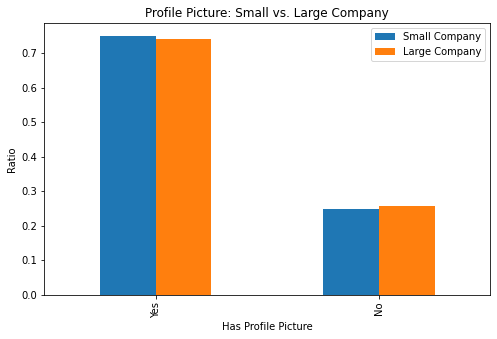

In [42]:
pfp.plot(kind='bar', x='Has Profile Picture', figsize=(8,5))
plt.title('Profile Picture: Small vs. Large Company')
plt.ylabel('Ratio')

LinkedIn users who include a profile picture comprise of 74% of users working at large companies. Even among the population of users working at smaller companies, a large percentage (75%) of them include a profile picture. Thus, including a profile picture would not be harmful to one's profile, and instead, can be benefitial.

## Block #3 Are there more LinkedIn Premium members than regular users working at well-known companies?

LinkedIn's premium membership allows users to easily connect with hiring managers, see who has viewed their profile, and access 15,000 expert-led LinkedIn Learning courses. It's priced up to $59.99 per month for job seekers, and it's said to be an investment for one's career. But, does the membership actually result in users working at the prestigious companies they're aiming for?

**1. Filter for rows where companyFollowerCount is greater than the mean**

In [43]:
unique_companies_df = linkedin_updated.groupby(['companyName']).agg({'companyFollowerCount':'mean'})
follower_count_mean = unique_companies_df['companyFollowerCount'].mean()

In [44]:
wellknown_company = linkedin_updated[linkedin_updated['companyFollowerCount']>follower_count_mean]

In [45]:
wellknown_company.shape

(15488, 11)

**2. Count the number of Premium users vs. regular users**

In [46]:
premium_wk = wellknown_company[wellknown_company['isPremium'] == 1.0]
len(premium_wk)

1827

In [47]:
regular_wk = wellknown_company[wellknown_company['isPremium'] == 0.0]
len(regular_wk)

13661

In [48]:
premium_wk_prop = len(premium_wk)/len(wellknown_company)
premium_wk_prop

0.11796229338842976

In [49]:
regular_wk_prop = len(regular_wk)/len(wellknown_company)
regular_wk_prop

0.8820377066115702

**3. Compare with lesser-known companies**

In [50]:
lesserknown_company = linkedin_updated[linkedin_updated['companyFollowerCount']<follower_count_mean]

In [51]:
premium_lk = lesserknown_company[lesserknown_company['isPremium'] == 1.0]
len(premium_lk)

3078

In [52]:
regular_lk = lesserknown_company[lesserknown_company['isPremium'] == 0.0]
len(regular_lk)

19288

In [53]:
premium_lk_prop = len(premium_lk)/len(lesserknown_company)
premium_lk_prop

0.13761960118036304

In [54]:
regular_lk_prop = len(regular_lk)/len(lesserknown_company)
regular_lk_prop

0.8623803988196369

**4. Compare with overall population averages.**

In [55]:
premium_overall = len(linkedin_updated[linkedin_updated['isPremium']==1])/len(linkedin_updated)

In [56]:
regular_overall = len(linkedin_updated[linkedin_updated['isPremium']==0])/len(linkedin_updated)

In [57]:
membership = pd.DataFrame({'User Type' : [ 'Premium', 'Regular'],
                      'Lesser Known Company' : [premium_lk_prop, regular_lk_prop],
                      'Well Known Company' : [premium_wk_prop, regular_wk_prop],
                          'Overall': [premium_overall, regular_overall]})
membership

,User Type,Lesser Known Company,Well Known Company,Overall
0,Premium,0.13762,0.117962,0.130533
1,Regular,0.86238,0.882038,0.869467


<AxesSubplot:xlabel='User Type'>

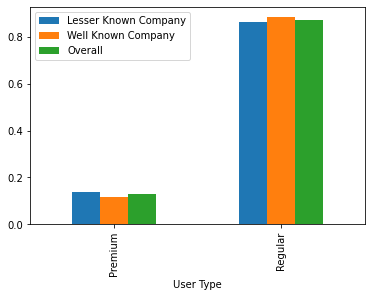

In [58]:
membership.plot(kind='bar', x='User Type')

**Results/Observations:**

Surprisingly, the proportion of Premium LinkedIn users is lower among the population of users working in well-known companies, compared to the proportion among users working in lesser-known companies. Although LinkedIn promotes the perks of their Premium membership, the investment might not be worth it after all.

## Block #4: Do millenials tend to switch positions more frequently than other age groups?

Millenials are often said to face commitment issues when it comes to their professional lives. But, do millenials actually job-hop (working briefly in job positions instead of staying for the long-term) more than the generations that preceded them? While investigating this matter, I came across two contrasting takes: a report by Gallup (an analytics and advisory company) and an article by Thrive Global (a behavior change technology and media provider company). The Gallup report indicated that millennials do, in fact, live up to their reputation of being job-hoppers, while the Thrive Global report challenged this view; terming it as a myth and 'busting' it.

Links to references: \
https://thriveglobal.com/stories/debunking-the-job-hopping-myth-millenials-are-not-that-bad/ \
https://www.gallup.com/workplace/231587/millennials-job-hopping-generation.aspx

**1. Create column that classifies whether or not a LinkedIn user is a millenial**

In [59]:
def mill(x):
    if x < 37:
        return True
    else:
        return False

In [60]:
linkedin_updated['millenial'] = linkedin_updated['ageEstimate'].apply(mill)

In [61]:
linkedin_updated.head()

,ageEstimate,companyFollowerCount,companyName,companyStaffCount,connectionsCount,followersCount,genderEstimate,hasPicture,isPremium,posTitle,avgMemberPosDuration,millenial
0,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Portfolio Executive,760.5000,False
1,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Solution Delivery Executive,760.5000,False
2,41.0,10047.0,CommSec,619.0,500.0,506.0,0.0,0,0.0,Project Manager,760.5000,False
3,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Project Manager,760.5000,False
4,30.0,300723.0,PayPal,22522.0,500.0,951.0,1.0,1,0.0,Senior Marketing Manager,395.2857,True


**2. Remove Interns from the dataset because their terms are meant to be temporary, and thus, it will skew position duration to be shorter**

In [62]:
interns = linkedin_updated[linkedin_updated['posTitle'].str.endswith('Intern')]
intern_filter = list(interns['posTitle'])
linkedin_jobhop_check = linkedin_updated[~linkedin_updated['posTitle'].isin(intern_filter)]
linkedin_jobhop_check['millenial'] = linkedin_jobhop_check['ageEstimate'].apply(mill)

**3. Find mean of `avgMemberPosDuration` for millenials**

In [63]:
millenial = linkedin_jobhop_check[linkedin_jobhop_check['millenial']==True]

In [64]:
millenial['avgMemberPosDuration'].mean()

656.0142387997422

**4. Compare this with the mean of `avgMemberPosDuration` for non-millenials**

In [65]:
non_millenial = linkedin_jobhop_check[linkedin_jobhop_check['millenial']==False]

In [66]:
non_millenial['avgMemberPosDuration'].mean()

1057.7825431874624

In [67]:
non_millenial['avgMemberPosDuration'].mean()/millenial['avgMemberPosDuration'].mean()

1.6124383902440962

**5. Create a boxplot that clearly compares the main statistics of the two generational groups**

Text(0.5, 0, 'Millenial: True of False')

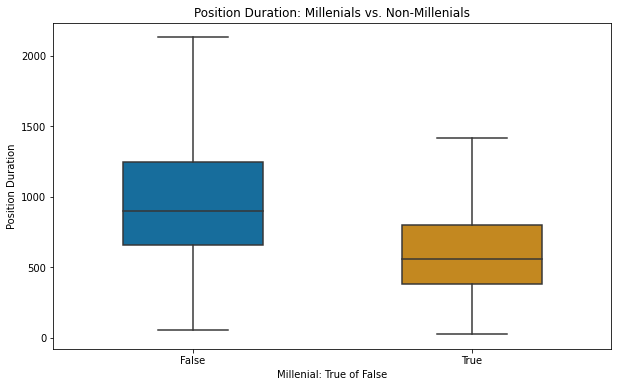

In [68]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='avgMemberPosDuration', x='millenial', data=linkedin_jobhop_check, width=0.5, palette="colorblind", showfliers=False)
ax.set_title('Position Duration: Millenials vs. Non-Millenials')
ax.set_ylabel('Position Duration')
ax.set_xlabel('Millenial: True of False')

**Results/Observations:**

Within this particular dataset, millenials do, indeed, tend to remain in their position for less time than non-millenials. This indicates that the term that Gallup uses ("job-hopping generation") to describe millenials holds some truth.

## Block #5 Do the proportion of Asians, Whites, and Blacks working at Fortune 500 companies reflect their overall population proportions?

Many Fortune 500 companies claim to provide an inclusive work environment for their employees. They often boast about their diversity, equity, and inclusion initiatives. But, are Fortune 500 companies as diverse as they claim to be?

Note: Because the `linkedin_updated` dataframe does not include `ethnicity`, I'll be using the `linkedin_original` dataframe for this analysis

**1. Create a column `f_500_check` that classifies whether or not the company that a LinkedIn user works at is included on the Fortune 500 list**

In [69]:
#upload csv with Fortune 500 list
f_500 = pd.read_csv('../data/raw/Fortune500.csv', encoding='latin-1')

In [70]:
f_500.rename(columns= {'ï»¿Company Name': 'company_name'}, inplace = True)
f_500.head()

,company_name
0,Walmart
1,Amazon.com
2,Exxon Mobil
3,Apple
4,CVS Health


In [71]:
f_500.to_csv('../data/clean/Fortune500.csv', index=False)

In [72]:
f_500_check = np.where(linkedin_original.company_name.isin(f_500.company_name), True, False)

In [73]:
linkedin_original['f_500_check'] = f_500_check

In [74]:
f_500_df = linkedin_original[linkedin_original['f_500_check'] == True]
f_500_df.head()

,avg_position_len,company_name,n_positions,age,beauty,blur,ethnicity,gender,smile,n_followers,f_500_check
5,304.0,Microsoft,1,37,57.570,0.421,Asian,0,77.536,420,True
11,304.0,Microsoft,1,37,57.570,0.421,Asian,0,77.536,420,True
12,1430.0,Microsoft,1,52,61.982,0.249,White,0,73.185,311,True
15,1430.0,Microsoft,1,52,61.982,0.249,White,0,73.185,311,True
19,1003.0,Microsoft,1,28,81.561,0.568,Asian,1,68.108,331,True


**2. Find the proportion of different races working within Fortune 500 companies**

In [75]:
asian_f500 = np.count_nonzero(f_500_df['ethnicity']=='Asian')
white_f500 = np.count_nonzero(f_500_df['ethnicity']=='White')
black_f500 = np.count_nonzero(f_500_df['ethnicity']=='Black')

In [76]:
asian_f500_prop = asian_f500/(asian_f500+white_f500+black_f500)
white_f500_prop = white_f500/(asian_f500+white_f500+black_f500)
black_f500_prop = black_f500/(asian_f500+white_f500+black_f500)

**3. Compare with the overall proportions**

In [77]:
white_prop = (linkedin_original['ethnicity']=='White').sum()/len(linkedin_original)
asian_prop = (linkedin_original['ethnicity']=='Asian').sum()/len(linkedin_original)
black_prop = (linkedin_original['ethnicity']=='Black').sum()/len(linkedin_original)

In [78]:
f500_race = pd.DataFrame({'Race' : [ 'Asian', 'White','Black'],
                      'All LinkedIn Users' : [asian_prop, white_prop, black_prop],
                      'Fortune 500' : [asian_f500_prop, white_f500_prop, black_f500_prop],})
f500_race

,Race,All LinkedIn Users,Fortune 500
0,Asian,0.155332,0.172531
1,White,0.766630,0.743079
2,Black,0.078038,0.084390


Text(0, 0.5, 'Ratio')

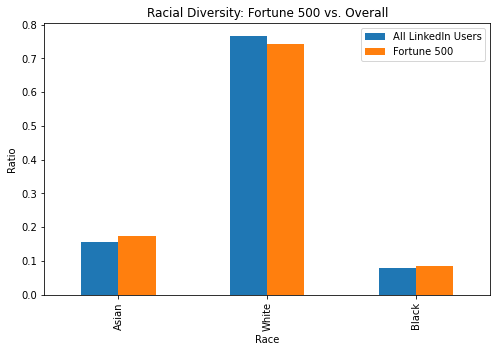

In [79]:
f500_race.plot(kind='bar', x='Race', figsize=(8,5))
plt.title('Racial Diversity: Fortune 500 vs. Overall')
plt.ylabel('Ratio')

**Results/Observations:**

The diversity within Fortune 500 companies reflects the diversity of the LinkedIn users within the dataset. In fact, there's a higher proportion of Asians and Blacks working in Fortune 500 companies than in the overall dataset.

This is a great sign that Fortune 500 companies are heading in the right direction towards the diverse and inclusive vision that they have. However, further analysis should be done to see whether the racial minorities working at these companies are receiving the same career growth opportunities than Whites. Does a glass ceiling exist for Asians and Blacks who want to pursue certain promotions?